# Euclidean Algorithm (GCD)
1. Subtraction $O(n)$
```python
def gcd(a, b):
    if a==b:
        return a
    if a>b:
        return gcd(a-b, b)
    else:
        return gcd(a, b-a)
```

2. Division $O(\log{a+b})$
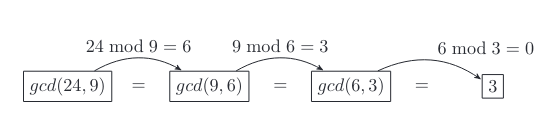
```python
def gcd(a, b):
    if a%b == 0:
        return b
    else:
        return gcd(b, a%b)
```

3. Binary $O(\log^2(ab))$
very large integer 에 대해, subtraction이나 division이 constant time에 일어나지 못하는 경우 유용하다. (bit >> 연산이 더 빨라서)
하지만, 파이썬은 assembly call stack 확인해보면 bit연산이 딱히 빠르지는 않아 애매하다.
```python
def gcd(a, b, res=1):
    if a==b:
        return res*a
    elif a%2==0 and b%2==0:
        return gcd(a>>1, b>>1, 2*res)
    elif a%2==0:
        return gcd(a>>1, b, res)
    elif b%2==0:
        return gcd(a, b>>1, res)
    elif a>b:
        return gcd(a-b, b, res)
    else:
        return gcd(a, b-a, res)
```

# LCM
$GCD \times LCM = A \times B$

# <span style="color:Salmon">CountNonDivisible</span>

<div class="brinza-task-description">
<p>Two positive integers N and M are given. Integer N represents the number of chocolates arranged in a circle, numbered from 0 to N − 1.</p>
<p>You start to eat the chocolates. After eating a chocolate you leave only a wrapper.</p>
<p>You begin with eating chocolate number 0. Then you omit the next M − 1 chocolates or wrappers on the circle, and eat the following one.</p>
<p>More precisely, if you ate chocolate number X, then you will next eat the chocolate with number (X + M) modulo N (remainder of division).</p>
<p>You stop eating when you encounter an empty wrapper.</p>
<p>For example, given integers N = 10 and M = 4. You will eat the following chocolates: 0, 4, 8, 2, 6.</p>
<p>The goal is to count the number of chocolates that you will eat, following the above rules.</p>
<p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;"><tt>def solution(N, M)</tt></p></blockquote>
<p>that, given two positive integers N and M, returns the number of chocolates that you will eat.</p>
<p>For example, given integers N = 10 and M = 4. the function should return 5, as explained above.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>N and M are integers within the range [<span class="number">1</span>..<span class="number">1,000,000,000</span>].</li>
</ul>
</blockquote></div>

In [ ]:
# LCM 을 구하고, 이 LCM을 M으로 나눈 값이 정답이 될 것 같다.
# GCD*LCM = A*B 이므로, LCM/B = A/GCD 다.
def gcd(A, B):
    if A%B == 0:
        return B
    else:
        return gcd(B, A%B)
        
def solution(N, M):
    _gcd = gcd(N, M)
    return N//_gcd

# <span style="color:Salmon">CommonPrimeDivisors</span>

<div class="brinza-task-description">
<p>A <i>prime</i> is a positive integer X that has exactly two distinct divisors: 1 and X. The first few prime integers are 2, 3, 5, 7, 11 and 13.</p>
<p>A prime D is called a <i>prime divisor</i> of a positive integer P if there exists a positive integer K such that D * K = P. For example, 2 and 5 are prime divisors of 20.</p>
<p>You are given two positive integers N and M. The goal is to check whether the sets of prime divisors of integers N and M are exactly the same.</p>
<p>For example, given:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>N = 15 and M = 75, the prime divisors are the same: {3, 5};</li>
<li>N = 10 and M = 30, the prime divisors aren't the same: {2, 5} is not equal to {2, 3, 5};</li>
<li>N = 9 and M = 5, the prime divisors aren't the same: {3} is not equal to {5}.</li>
</ul>
</blockquote><p>Write a function:</p>
<blockquote><p style="font-family: monospace; font-size: 9pt; display: block; white-space: pre-wrap;"><tt>def solution(A, B)</tt></p></blockquote>
<p>that, given two non-empty arrays A and B of Z integers, returns the number of positions K for which the prime divisors of A[K] and B[K] are exactly the same.</p>
<p>For example, given:</p>
<tt style="white-space: pre-wrap;">    A[0] = 15   B[0] = 75
    A[1] = 10   B[1] = 30
    A[2] = 3    B[2] = 5</tt>
<p>the function should return 1, because only one pair (15, 75) has the same set of prime divisors.</p>
<p>Write an <b><b>efficient</b></b> algorithm for the following assumptions:</p>
<blockquote><ul style="margin: 10px; padding: 0px;"><li>Z is an integer within the range [<span class="number">1</span>..<span class="number">6,000</span>];</li>
<li>each element of arrays A and B is an integer within the range [<span class="number">1</span>..<span class="number">2,147,483,647</span>].</li>
</ul>
</blockquote></div>

# solution 
$$M = {x_1}^{a_1} \times {x_2}^{a_2} \times {x_3}^{a_3}\times ...$$
$$N = {y_1}^{b_1} \times {y_2}^{b_2} \times {y_3}^{b_3}\times ...$$  
일 때, $\vec{x}=\vec{y}$라면, $M = {M\over{GCD(M,N)}}$ 연산을 반복했을 때 $M=1$ 이 된다.  
이는 $N$에 대해서도 마찬가지다.  
만약 서로 다른 소인수 $x_n$ 과 $y_n$이 존재한다면, $M$과 $N$은 위 연산을 통해 1이 될 수 없다.  
$x$의 원소 집합이 $y$의 원소 집합의 진부분집합이라면, $M$은 위 연산을 통해 1이 될 수 있지만, $N$은 1이 될 수 없다. ($GCD(M,N)$이 $N$의 소인수 일부를 포함하지 못하기 때문)

In [37]:
def gcd(A, B):
    if A%B == 0:
        return B
    else:
        return gcd(B, A%B)

def check(a:int, b:int) -> bool:
    while a>1:
        _gcd = gcd(a, b)
        if _gcd == 1:
            return False
        a //= _gcd
    return True

def solution(A, B):
    answer = 0
    for a, b in zip(A, B):
        if check(a, b) and check(b, a):
            answer += 1
    return answer

solution([15, 10, 3], [75, 30, 5])

1